# Лабораторная работа #4
### Варламов Никита, М33361; Гайнанов Ильдар, М33371;

In [33]:
import pandas as pd

df = pd.read_csv('fifa_players_stats.csv')
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


Задание 1. Проверяем согласованность Overall с нормальным законом

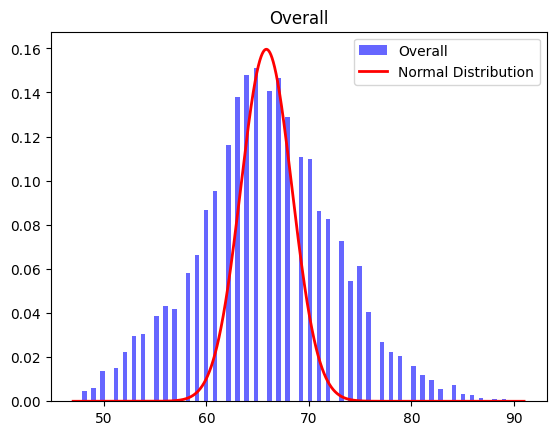

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def plot_bins(data, title, std=None):
    plt.hist(data, bins=100, density=True, alpha=0.6, color='b', label=title)
    x = np.linspace(min(data), max(data), 10000)
    if std != None:
        plt.plot(x, norm.pdf(x, data.mean(), std), 'r-', lw=2, label='Normal Distribution')
    plt.title(title)
    plt.legend()
    plt.show()
    
plot_bins(df['Overall'], "Overall", 2.5)

Как видно по графику, распределены они не по нормальному закону. Попробуем статистические тесты! Первым используем критерий Шапиро-Уилла (Shapiro-Will). Нулевая гипотеза $H_0$ в этом случае: выборка распределена нормально.

In [58]:
from scipy.stats import shapiro

shapiro(df['Overall'])

/Users/snitron/PycharmProjects/matstat/venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9953896999359131, pvalue=1.3854926583743106e-23)

pvalue < 0.05, следовательно $H_0$ отвергаем. Попробуем ещё какой-нибудь тест, например Колмогорова-Смирнова: 

In [59]:
from scipy.stats import kstest

kstest(df['Overall'], "norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=47, statistic_sign=-1)

И тест Харке — Бера:

In [60]:
from scipy.stats import jarque_bera

jarque_bera(df['Overall'])

SignificanceResult(statistic=51.76288176314877, pvalue=5.752187598415661e-12)

2. Проверить гипотезу однородности для французских и немецких футболистов (Overall): 


In [61]:
french = df[df['Nationality'] == 'France']
french

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
19,N. Kanté,N'Golo Kanté,89,89,72000000,"CDM,CM",CDM,France,https://cdn.sofifa.net/players/215/914/23_60.png,31,...,81,84,81,87,89,87,87,87,87,23
33,H. Lloris,Hugo Lloris,87,87,9000000,GK,GK,France,https://cdn.sofifa.net/players/167/948/23_60.png,35,...,40,44,40,37,41,37,36,32,36,87
37,M. Maignan,Mike Maignan,87,90,80000000,GK,GK,France,https://cdn.sofifa.net/players/215/698/23_60.png,26,...,44,47,44,38,43,38,36,37,36,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17917,K. Agro,Koca Manu Agro,53,61,180000,GK,GK,France,https://cdn.sofifa.net/players/271/245/23_60.png,20,...,18,19,18,18,20,18,18,21,18,54
17938,E. Viegbe,Eyram Viegbe,53,70,230000,CDM,CDM,France,https://cdn.sofifa.net/players/270/408/23_60.png,18,...,50,51,50,53,54,53,53,53,53,15
17976,D. Durivaux,Dylan Durivaux,53,60,180000,RB,RB,France,https://cdn.sofifa.net/players/270/704/23_60.png,21,...,46,41,46,51,47,51,53,52,53,16
17981,A. Gauthier,Antoine Gauthier,53,71,240000,CM,CAM,France,https://cdn.sofifa.net/players/271/735/23_60.png,18,...,56,55,56,50,50,50,50,47,50,18


In [62]:
german = df[df['Nationality'] == 'Germany']
german

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
17,J. Kimmich,Joshua Kimmich,89,90,105500000,"CDM,RB",CDM,Germany,https://cdn.sofifa.net/players/212/622/23_60.png,27,...,86,89,86,87,89,87,86,84,86,24
27,M. ter Stegen,Marc-André ter Stegen,88,89,68500000,GK,GK,Germany,https://cdn.sofifa.net/players/192/448/23_60.png,30,...,42,48,42,36,44,36,34,36,34,89
28,T. Kroos,Toni Kroos,88,88,72000000,CM,CM,Germany,https://cdn.sofifa.net/players/182/521/23_60.png,32,...,84,88,84,80,84,80,77,74,77,22
30,A. Rüdiger,Antonio Rüdiger,87,88,73500000,CB,CB,Germany,https://cdn.sofifa.net/players/205/452/23_60.png,29,...,71,74,71,81,83,81,83,88,83,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18215,M. Lutz,Marc Lutz,51,60,120000,CB,CB,Germany,https://cdn.sofifa.net/players/271/753/23_60.png,21,...,41,42,41,49,49,49,50,53,50,17
18268,L. Kugland,Leon Kugland,51,62,130000,LB,LB,Germany,https://cdn.sofifa.net/players/268/278/23_60.png,22,...,47,45,47,51,50,51,51,49,51,15
18306,A. Rühlemann,Arne Rühlemann,51,68,150000,CM,CAM,Germany,https://cdn.sofifa.net/players/270/006/23_60.png,17,...,53,53,53,52,52,52,52,49,52,16
18358,F. Butscher,Florian Butscher,50,64,110000,CM,CAM,Germany,https://cdn.sofifa.net/players/271/752/23_60.png,19,...,52,52,52,51,51,51,51,49,51,18


In [63]:
from scipy.stats import mannwhitneyu

mannwhitneyu(french['Overall'][:900], german['Overall'][:900])

MannwhitneyuResult(statistic=408833.0, pvalue=0.7276697473312008)

In [64]:
from scipy.stats import ks_2samp

mannwhitneyus = []
ks_2samps = []

for i in range(1000):
    s1 = french['Overall'].sample(900)
    s2 = german['Overall'].sample(900)
    mannwhitneyus.append(mannwhitneyu(s1, s2).pvalue)
    ks_2samps.append(ks_2samp(s1, s2).pvalue)
    
mannwhitneyus = np.array(mannwhitneyus)
ks_2samps = np.array(ks_2samps)

In [65]:
mannwhitneyus.mean()

5.9431345287070416e-08

In [66]:
ks_2samps.mean()

4.787254691348412e-08

В обоих случаях pvalue < 0.05, следовательно нулевая гипотеза о их однородности (схожести распределений и вариативности) отвергается. Это же, также, видно из следующих графиков: 

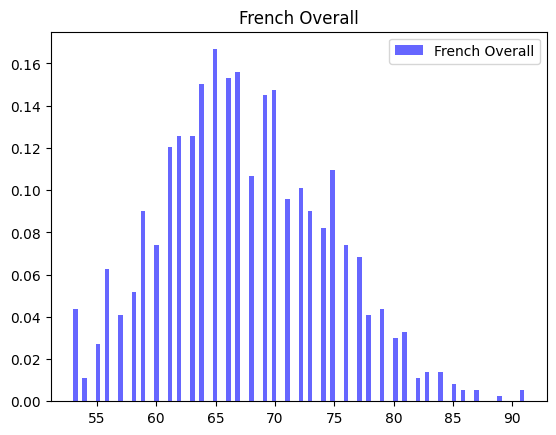

In [67]:
plot_bins(french['Overall'], "French Overall")

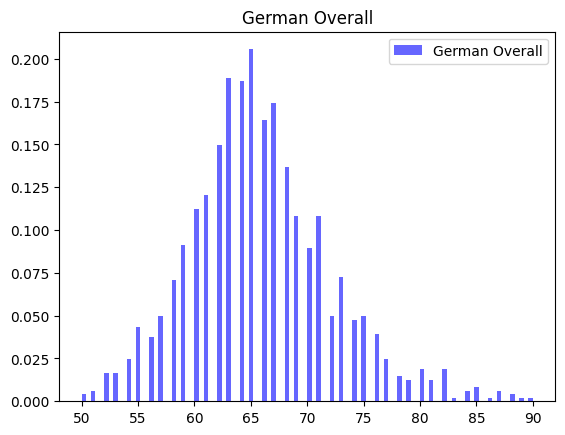

In [68]:
plot_bins(german['Overall'], "German Overall")